# 1. 多神经元分类问题

假如对单神经元的模型92.28%的准确率还不满意

那么对于神经网络来说，可以添加多一些神经元

那么，还是以MNIST手写数字识别问题为例

# 2. 数据读取

利用网上的 MNIST 数据集(http://yann.lecun.com/exdb/mnist/)获取数据集压缩文件（切勿解压）：

train-images-idx3-ubyte.gz --- 6万张28x28大小的训练数字图像

train-labels-idx1-ubyte.gz --- 6万张训练图像的数字标记

t10k-images-idx3-ubyte.gz  --- 1万张28x28大小的测试数字图像

t10k-labels-idx1-ubyte.gz  --- 1万张测试图像的数字标记

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 载入数据集
mnist = input_data.read_data_sets("../data/", one_hot=True)

# 显示数据集数量
print("训练集数量：", mnist.train.num_examples)
print("验证集数量：", mnist.validation.num_examples)
print("测试集数量：", mnist.test.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
训练集数量： 55000
验证集数量： 5000
测试集数量： 10000


In [2]:
# 显示数据集大小
print("训练图像大小：", mnist.train.images.shape)
print("训练标签大小：", mnist.train.labels.shape)

训练图像大小： (55000, 784)
训练标签大小： (55000, 10)


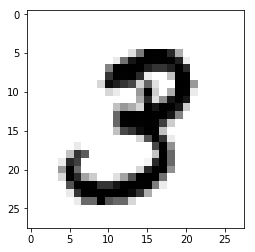

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [3]:
# 可视化图像
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show()


# 可视化第二张训练图像
plot_image(mnist.train.images[1])

# 可视化第二张图像的标签
print(mnist.train.labels[1])

# 3. 构建模型

In [4]:
# 定义训练数据的占位符， x是784个像素点的特征值， y是10分类的标签值
x = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="Y")

H1_NN = 256  # 第一隐藏层神经元为256个
H2_NN = 128  # 第二隐藏层神经元为128个

# 第一隐藏层权重
W1 = tf.Variable(tf.random_normal([784, H1_NN], stddev=0.01))
b1 = tf.Variable(tf.zeros([H1_NN]))

# 第二隐藏层权重
W2 = tf.Variable(tf.random_normal([H1_NN, H2_NN], stddev=0.01))
b2 = tf.Variable(tf.zeros([H2_NN]))

# 输出层权重
W3 = tf.Variable(tf.random_normal([H2_NN, 10], stddev=0.01))
b3 = tf.Variable(tf.zeros([10]))

# 定义向前传播计算
A1 = tf.nn.relu(tf.matmul(x, W1) + b1)  # 使用relu激活函数计算第一隐藏层结果
A2 = tf.nn.relu(tf.matmul(A1, W2) + b2)  # 使用relu激活函数计算第二隐藏层结果
forward = tf.matmul(A2, W3) + b3  # 计算输出层结果

# 定义分类结果softmax分类
pred = tf.nn.softmax(forward)

# 定义逻辑回归损失函数
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=forward, labels=y))

Instructions for updating:
Colocations handled automatically by placer.


# 4. 训练模型

In [5]:
train_epochs = 50  # 迭代次数
learning_rate = 0.01  # 学习率

# 梯度下降优化器 设置学习率和优化目标损失最小化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

# 定义预测类别匹配情况
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

# 定义准确率，将布尔值转化成浮点数，再求平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()  # 建立会话
init = tf.global_variables_initializer()  # 变量初始化
sess.run(init)

# 每个批次的大小，每次放入的大小，每次放入 50张图片 以矩阵的方式
batch_size = 50

# 计算一共有多少个批次，数量整除大小训练出有多少批次
n_batch = mnist.train.num_examples // batch_size

# 批次迭代训练
for epoch in range(train_epochs):
    for batch in range(n_batch):
        xs, ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: xs, y: ys})
    # 批次训练完成之后，使用验证数据计算误差与准确率
    loss, acc = sess.run([loss_function, accuracy],
                         feed_dict={x: mnist.validation.images,
                                    y: mnist.validation.labels})
    # 显示训练信息
    print("Train Epoch", '%02d' % (epoch + 1), "Loss=", '{:.9f}'.format(loss), "Accuracy=", "{:.4f}".format(acc))

Train Epoch 01 Loss= 2.296337843 Accuracy= 0.1126
Train Epoch 02 Loss= 2.117797136 Accuracy= 0.2906
Train Epoch 03 Loss= 0.778396070 Accuracy= 0.7488
Train Epoch 04 Loss= 0.593462288 Accuracy= 0.8248
Train Epoch 05 Loss= 0.483155459 Accuracy= 0.8676
Train Epoch 06 Loss= 0.404690206 Accuracy= 0.8888
Train Epoch 07 Loss= 0.357581675 Accuracy= 0.9004
Train Epoch 08 Loss= 0.326732367 Accuracy= 0.9060
Train Epoch 09 Loss= 0.302614897 Accuracy= 0.9164
Train Epoch 10 Loss= 0.284338713 Accuracy= 0.9192
Train Epoch 11 Loss= 0.260221779 Accuracy= 0.9296
Train Epoch 12 Loss= 0.242645726 Accuracy= 0.9314
Train Epoch 13 Loss= 0.226237401 Accuracy= 0.9392
Train Epoch 14 Loss= 0.211504608 Accuracy= 0.9410
Train Epoch 15 Loss= 0.197295368 Accuracy= 0.9432
Train Epoch 16 Loss= 0.185904428 Accuracy= 0.9474
Train Epoch 17 Loss= 0.177183345 Accuracy= 0.9492
Train Epoch 18 Loss= 0.169540569 Accuracy= 0.9532
Train Epoch 19 Loss= 0.158353582 Accuracy= 0.9562
Train Epoch 20 Loss= 0.152251393 Accuracy= 0.9578


# 5. 评估模型

In [6]:
# 测试集上评估模型预测的准确率
accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("Test Accuracy = ", accu_test)

# 验证集上评估模型预测的准确率
accu_validation = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
print("Validation Accuracy = ", accu_validation)

# 训练集上评估模型预测的准确率
accu_train = sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels})
print("Train Accuracy = ", accu_train)

Test Accuracy =  0.9737
Validation Accuracy =  0.9754
Train Accuracy =  0.98896366


# 6. 模型预测

In [7]:
# 转换pred预测结果独热编码格式为数字0-9
prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})

# 查看第100-109张测试图片的预测结果
print(prediction_result[100:110])

[6 0 5 4 9 9 2 1 9 4]


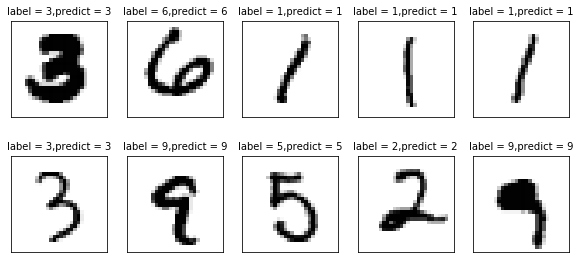

In [8]:
# 定义比对可视化函数
def plot_images_labels_prediction(images,  # 图像列表
                                  labels,  # 标签列表
                                  prediction,  # 预测值列表
                                  index,  # 开始显示的索引
                                  num=5):  # 缺省一次显示5张
    fig = plt.gcf()  # 获取当前图表，get current figure
    fig.set_size_inches(10, 12)  # 1英寸等于2.54cm

    if num > 25:  # 最多显示25张图片
        num = 25

    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)  # 获取当前要处理的图片
        ax.imshow(np.reshape(images[index], (28, 28)), cmap='binary')  # 显示第index个图像
        title = 'label = ' + str(np.argmax(labels[index]))  # 显示标签的标题
        if len(prediction) > 0:  # 如果有预测结果的话，添加显示预测的标题
            title += ',predict = ' + str(prediction[index])
        ax.set_title(title, fontsize=10)  # 显示图上的标题
        # 不显示坐标轴
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()


# 可视化第200-209张测试图片的预测结果对比
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,
                              200, 10)